# Simulación de código para la orientación laboral

Análisis de habilidades y recomendación de empleo



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Cargar datos ficticios de empleos y habilidades
data = {'empleo': ['Data Scientist', 'Software Engineer', 'Marketing Analyst'],
        'habilidades_requeridas': ['Python, Machine Learning, SQL',
                                   'Java, Spring Boot, Microservices',
                                   'Google Analytics, SEO, PPC']}
df = pd.DataFrame(data)

# Habilidades del usuario
perfil_usuario = "Python, SQL, Deep Learning"

# Vectorizar habilidades
vectorizer = TfidfVectorizer()
matriz_tfidf = vectorizer.fit_transform(df['habilidades_requeridas'])

# Comparar con el perfil del usuario
vector_usuario = vectorizer.transform([perfil_usuario])
similitudes = cosine_similarity(vector_usuario, matriz_tfidf)

# Mostrar el empleo más adecuado
df['similaridad'] = similitudes[0]
print(df.sort_values(by='similaridad', ascending=False))


              empleo            habilidades_requeridas  similaridad
0     Data Scientist     Python, Machine Learning, SQL     0.866025
1  Software Engineer  Java, Spring Boot, Microservices     0.000000
2  Marketing Analyst        Google Analytics, SEO, PPC     0.000000


Intento de mejora del código

In [ ]:
# Instalar bibliotecas necesarias (si aún no están instaladas)
!pip install pandas scikit-learn

# Importar librerías
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Cargar datos ficticios de empleos y habilidades
data = {
    'empleo': ['Data Scientist', 'Software Engineer', 'Marketing Analyst', 'Cybersecurity Specialist', 'Cloud Engineer'],
    'habilidades_requeridas': [
        'Python, Machine Learning, SQL, Deep Learning',
        'Java, Spring Boot, Microservices, Kubernetes',
        'Google Analytics, SEO, PPC, Digital Marketing',
        'Cybersecurity, Network Security, Ethical Hacking',
        'AWS, Cloud Computing, DevOps, Docker'
    ]
}
df = pd.DataFrame(data)

# Permitir que el usuario ingrese sus habilidades
perfil_usuario = input("Ingrese sus habilidades separadas por comas: ").strip()

# Vectorizar habilidades con eliminación de palabras irrelevantes
vectorizer = TfidfVectorizer(stop_words='english')
matriz_tfidf = vectorizer.fit_transform(df['habilidades_requeridas'])

# Comparar con el perfil del usuario
vector_usuario = vectorizer.transform([perfil_usuario])
similitudes = cosine_similarity(vector_usuario, matriz_tfidf)

# Agregar columna de similitud al DataFrame
df['similaridad'] = similitudes[0]

# Ordenar empleos por mayor similitud
df_ordenado = df.sort_values(by='similaridad', ascending=False)

# Mostrar resultados
print("\nEmpleos recomendados:")
print(df_ordenado[['empleo', 'similaridad']])

# Guardar resultados en un archivo CSV
df_ordenado.to_csv("recomendaciones_empleo.csv", index=False)


# Descargar el archivo en Google Colab
from google.colab import files
files.download(output_file)

print("\nResultados guardados en 'recomendaciones_empleo.csv'. Puedes descargarlo desde el enlace generado.")


Ingrese sus habilidades separadas por comas: Google Analytics, SEO, PPC, Digital Marketing, Cybersecurity, Network Security, Ethical Hacking, AWS, Cloud Computing, DevOps, Docker

Empleos recomendados:
                     empleo  similaridad
2         Marketing Analyst     0.612372
4            Cloud Engineer     0.559017
3  Cybersecurity Specialist     0.559017
0            Data Scientist     0.000000
1         Software Engineer     0.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Resultados guardados en 'recomendaciones_empleo.csv'. Puedes descargarlo desde el enlace generado.


Análisis de requisitos del mercado laboral


In [ ]:
# Instalar bibliotecas necesarias
!pip install requests beautifulsoup4 pandas

# Importar bibliotecas
import requests
from bs4 import BeautifulSoup
from collections import Counter
import re
import pandas as pd
import time

# URL de la oferta de empleo (reemplaza con la URL que quieras analizar)
job_url = "https://www.linkedin.com/jobs/view/4178281566/?alternateChannel=search&refId=2%2Bl4Y%2BnchZd5TsdX5Hwnig%3D%3D&trackingId=fu4bAp7ltvJuFTv7UKB1dA%3D%3D" # Ejemplo de URL

# Realizar la solicitud HTTP con encabezados para evitar bloqueos
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
response = requests.get(job_url, headers=headers)

# Verificar si la solicitud fue exitosa
if response.status_code != 200:
    print(f"Error al acceder a la página: {response.status_code}")
    exit()

# Parsear el HTML con BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Extraer el texto de la descripción del trabajo
job_description = soup.find("div", class_="show-more-less-html__markup")
if job_description:
    job_text = job_description.get_text()
else:
    print("No se encontró la descripción del trabajo.")
    exit()

# Lista ampliada de habilidades clave a buscar
skills_list = [
    "Python", "SQL", "TensorFlow", "Big Data", "Cloud", "Machine Learning", "Deep Learning",
    "AI", "Data Visualization", "Pandas", "Scikit-Learn", "Hadoop", "Spark",
    "Kubernetes", "AWS", "Docker", "Excel", "Power BI", "Tableau", "NLP", "PyTorch"
]

# Filtrar palabras clave de habilidades
skills_pattern = r'\b(' + '|'.join(skills_list) + r')\b'
skills = re.findall(skills_pattern, job_text, re.I)
conteo = Counter(skills)

# Convertir resultados a un DataFrame y guardarlo en CSV
df_skills = pd.DataFrame(conteo.most_common(), columns=["Habilidad", "Frecuencia"])
output_file = "habilidades_oferta.csv"
df_skills.to_csv(output_file, index=False)

# Mostrar resultados
print("\nHabilidades encontradas en la oferta de trabajo:")
print(df_skills)

# Descargar el archivo CSV en Google Colab
from google.colab import files
files.download(output_file)

print(f"\nResultados guardados en '{output_file}'. Puedes descargarlo desde el enlace generado.")


Habilidades encontradas en la oferta de trabajo:
  Habilidad  Frecuencia
0     Excel           1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Resultados guardados en 'habilidades_oferta.csv'. Puedes descargarlo desde el enlace generado.


In [ ]:
# Instalar bibliotecas necesarias
!pip install requests beautifulsoup4 pandas

# Importar bibliotecas
import requests
from bs4 import BeautifulSoup
from collections import Counter
import re
import pandas as pd
import time

# Lista de URLs de ofertas de empleo
job_urls = [
    "https://www.linkedin.com/jobs/view/4178281566/?alternateChannel=search&refId=2%2Bl4Y%2BnchZd5TsdX5Hwnig%3D%3D&trackingId=fu4bAp7ltvJuFTv7UKB1dA%3D%3D",
    "https://www.linkedin.com/jobs/view/4175971162/?alternateChannel=search&eBP=CwEAAAGVq0PCowa593ajV9ssyAzS4-jb9Oh9gW6ItBODafRgbOQ97qyEG6T7FMsb3YvT5pA5Ukm05b8IYXrPHOeug2LlafdulMjFbC4BB9IWxGNxEIbHW_L2s-K-9IzX4N7D0decc7vVfjKEeMS77FyFbGFoqp0NxaoG4BdZeZ7Z8LHG_CoxEAwC2GGB01oYUw3enZ5knroUU-9ZRn0qMu_Tjj40pVbg8Qr9vt4htVoyVTFLfK988yGEutmPVPZXoYuBq2YHKzwamS2iyOvwV3_aFoZ7TG-IUbAWeiKV7WpaHQQAzkeIRjbnmZ7H8FrSTd2UZ4u3O4BT3pwww5FvqNtdQVRhA-1to7stcyQiVEecPhWTI_nnck0UxjUhsTAJTLS5rbZtpD5aNVd3Oi7rJ6cOJirPV5mQJdfYveUaZOsw5CMsil57UKnGfoQvo40IrTavbMrHwDDKrjXLt3hqkcTgeKSrXa_3LGxy8EpvGPZNc2HKJhJHofbpWEekwDuudAxypcZOyu6qKg&refId=2%2Bl4Y%2BnchZd5TsdX5Hwnig%3D%3D&trackingId=u1ZDUPIAY%2FZzIwlpeHasUg%3D%3D&trk=flagship3_search_srp_jobs",
    "https://www.linkedin.com/jobs/view/4183870911/?eBP=CwEAAAGVq0PCo_b4trHj1h3Z77YEcofUWLrKQamqjTagulvhMvn8RRljntDP7sKFHDB-Ksx8iRXxVreTVwcXnIC7EHYyePEOyWRjwMpK7ZlfUdhPr60z8jQGeFkCnJ5-X20VAd4H5qKFSZFYBNAKnREuBQSJGd3P8t9RStaeVYgQee_PkO9wtUG9HqzhjBDPLlEV9YhUmzb32GUNwEOm3c5iqecXY3CSHlPhU8qL7qnNYu7ifM5bvUmo0rzrtffz3UmaEGQ2aa9lC-Oyi6JpVqcRSf0vaHoxyqMWTp6XssaGVacP4v4hizcIan_hGxUjH7MgWvVDBu-rHFXkCwgqwAm-dovb-BHyaRi_fq7cVR0nn4bXbh29WYW0d3ZO55HPauVKAtoZky7xw7601sQGgzSLBKeKkCPTyU_egyL56deZFpBw1I94vbk3MGSChFTrSeo3Qd_jvRkv0AKfV3QbjBsUYxMRJ5nGl3o08RBK5KsIkK6EORcnPPc-koRn98XibkFBsdtXcPTyQ6fJqZ9Hr9D7&refId=2%2Bl4Y%2BnchZd5TsdX5Hwnig%3D%3D&trackingId=tksHORWvd9oDn9E%2FV1Lo4A%3D%3D&trk=flagship3_search_srp_jobs",
    "https://www.linkedin.com/jobs/view/4185292341/?eBP=BUDGET_EXHAUSTED_JOB&refId=2%2Bl4Y%2BnchZd5TsdX5Hwnig%3D%3D&trackingId=82EKsVOGFoW%2FD%2FlHsf83%2Bw%3D%3D&trk=flagship3_search_srp_jobs",
]

# Lista para almacenar los resultados de cada URL
all_results = []

# Iterar sobre cada URL
for job_url in job_urls:
    try:
        # Realizar la solicitud HTTP con encabezados para evitar bloqueos
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
        }
        response = requests.get(job_url, headers=headers)

        # Verificar si la solicitud fue exitosa
        if response.status_code != 200:
            print(f"Error al acceder a la página: {job_url} - {response.status_code}")
            continue  # Saltar a la siguiente URL

        # Parsear el HTML con BeautifulSoup
        soup = BeautifulSoup(response.text, "html.parser")

        # Extraer el título de la oferta de trabajo
        job_title_element = soup.find("h1", class_="top-card-layout__title")
        job_title = job_title_element.text.strip() if job_title_element else "Título no encontrado"

        # Extraer el texto de la descripción del trabajo
        job_description = soup.find("section", {"class": "show-more-less-html"})
        if job_description:
            job_text = job_description.get_text(separator='\n', strip=True)
        else:
            print(f"No se encontró la descripción del trabajo: {job_url}")
            continue

        # Lista ampliada de habilidades clave a buscar
        skills_list = [
            "Python", "SQL", "TensorFlow", "Big Data", "Cloud", "Machine Learning", "Deep Learning",
            "AI", "Data Visualization", "Pandas", "Scikit-Learn", "Hadoop", "Spark",
            "Kubernetes", "AWS", "Docker", "Excel", "Power BI", "Tableau", "NLP", "PyTorch"
        ]

        # Filtrar palabras clave de habilidades
        skills_pattern = r'\b(' + '|'.join(skills_list) + r')\b'
        skills = re.findall(skills_pattern, job_text, re.I)
        conteo = Counter(skills)

        # Almacenar resultados
        all_results.append({
            "url": job_url,
            "title": job_title,
            "skills": ", ".join([skill for skill, count in conteo.most_common()])  # Unir habilidades en una cadena
        })

        print(f"Habilidades extraídas de: {job_url}")
        time.sleep(1)  # Espera de un segundo para evitar bloqueos.

    except Exception as e:
        print(f"Error al procesar {job_url}: {e}")

# Combinar todos los resultados en un DataFrame
df_all_skills = pd.DataFrame(all_results)

# Guardar el DataFrame en CSV
output_file = "habilidades_multiples_ofertas.csv"
df_all_skills.to_csv(output_file, index=False)

# Mostrar resultados
print("\nHabilidades encontradas en todas las ofertas de trabajo:")
print(df_all_skills)

# Descargar el archivo CSV en Google Colab
from google.colab import files
files.download(output_file)

print(f"\nResultados guardados y descargados como '{output_file}'.")

Habilidades extraídas de: https://www.linkedin.com/jobs/view/4178281566/?alternateChannel=search&refId=2%2Bl4Y%2BnchZd5TsdX5Hwnig%3D%3D&trackingId=fu4bAp7ltvJuFTv7UKB1dA%3D%3D
Habilidades extraídas de: https://www.linkedin.com/jobs/view/4175971162/?alternateChannel=search&eBP=CwEAAAGVq0PCowa593ajV9ssyAzS4-jb9Oh9gW6ItBODafRgbOQ97qyEG6T7FMsb3YvT5pA5Ukm05b8IYXrPHOeug2LlafdulMjFbC4BB9IWxGNxEIbHW_L2s-K-9IzX4N7D0decc7vVfjKEeMS77FyFbGFoqp0NxaoG4BdZeZ7Z8LHG_CoxEAwC2GGB01oYUw3enZ5knroUU-9ZRn0qMu_Tjj40pVbg8Qr9vt4htVoyVTFLfK988yGEutmPVPZXoYuBq2YHKzwamS2iyOvwV3_aFoZ7TG-IUbAWeiKV7WpaHQQAzkeIRjbnmZ7H8FrSTd2UZ4u3O4BT3pwww5FvqNtdQVRhA-1to7stcyQiVEecPhWTI_nnck0UxjUhsTAJTLS5rbZtpD5aNVd3Oi7rJ6cOJirPV5mQJdfYveUaZOsw5CMsil57UKnGfoQvo40IrTavbMrHwDDKrjXLt3hqkcTgeKSrXa_3LGxy8EpvGPZNc2HKJhJHofbpWEekwDuudAxypcZOyu6qKg&refId=2%2Bl4Y%2BnchZd5TsdX5Hwnig%3D%3D&trackingId=u1ZDUPIAY%2FZzIwlpeHasUg%3D%3D&trk=flagship3_search_srp_jobs
Habilidades extraídas de: https://www.linkedin.com/jobs/view/4183870911/?eBP=CwEAAAGV

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Resultados guardados y descargados como 'habilidades_multiples_ofertas.csv'.


Predicción de éxito laboral


----- Random Forest -----
Precisión: 0.485


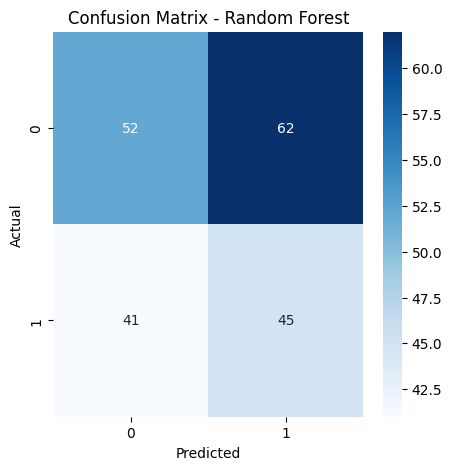

              precision    recall  f1-score   support

           0       0.56      0.46      0.50       114
           1       0.42      0.52      0.47        86

    accuracy                           0.48       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.50      0.48      0.49       200



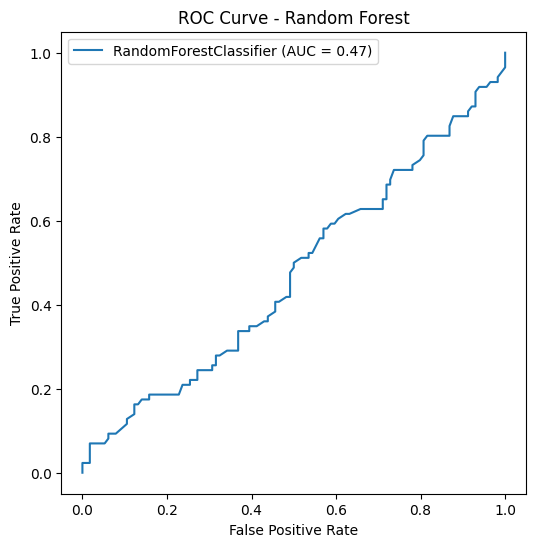

AUC for RandomForestClassifier: 0.47322521419828634
----- Gradient Boosting -----
Precisión: 0.475


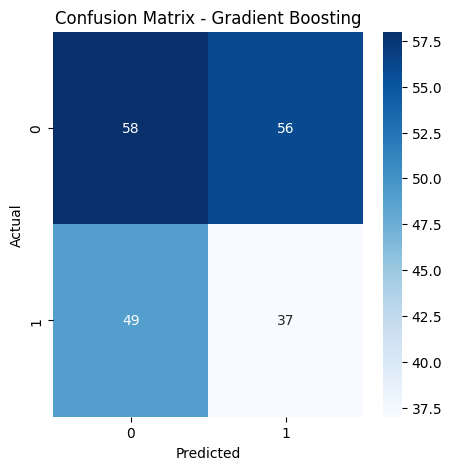

              precision    recall  f1-score   support

           0       0.54      0.51      0.52       114
           1       0.40      0.43      0.41        86

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.48      0.47      0.48       200



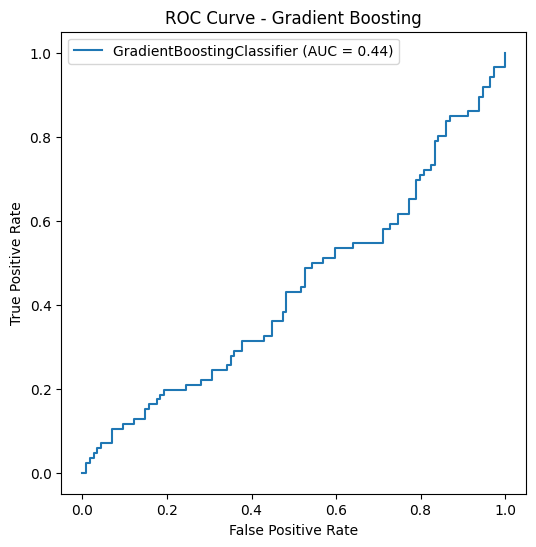

AUC for GradientBoostingClassifier: 0.4382904936760506
----- AdaBoost -----
Precisión: 0.49


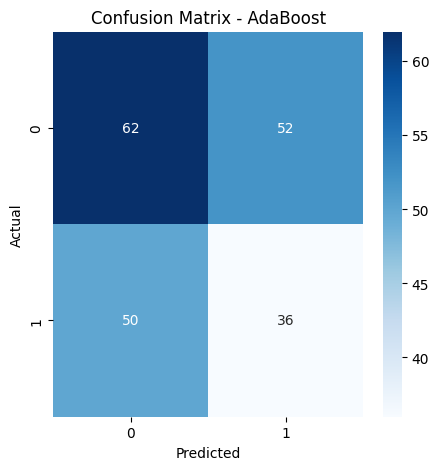

              precision    recall  f1-score   support

           0       0.55      0.54      0.55       114
           1       0.41      0.42      0.41        86

    accuracy                           0.49       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.49      0.49      0.49       200



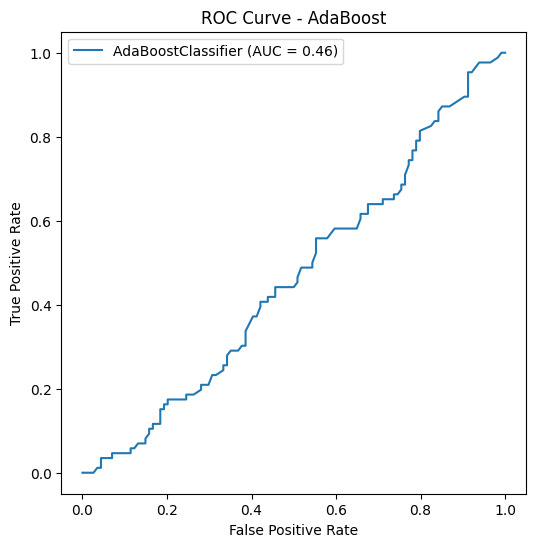

AUC for AdaBoostClassifier: 0.4640452876376989
----- Logistic Regression -----
Precisión: 0.53


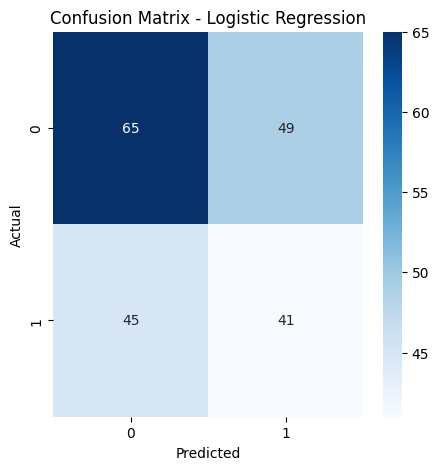

              precision    recall  f1-score   support

           0       0.59      0.57      0.58       114
           1       0.46      0.48      0.47        86

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.53      0.53      0.53       200



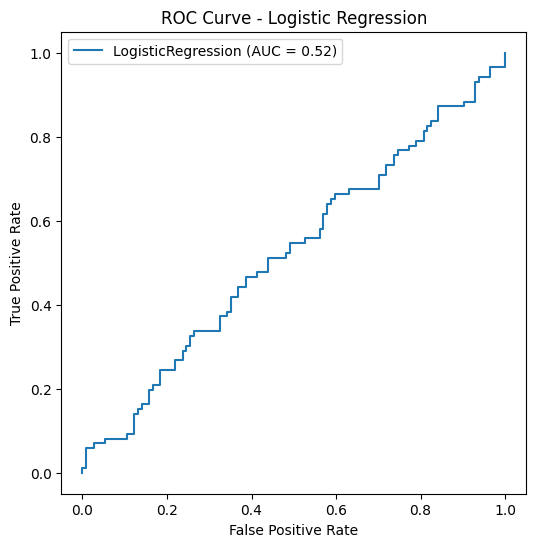

AUC for LogisticRegression: 0.5220318237454101
----- Support Vector Machine -----
Precisión: 0.455


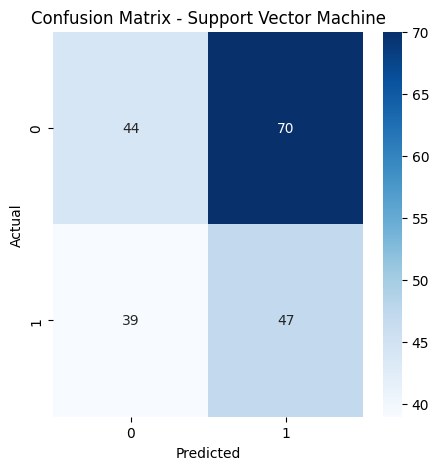

              precision    recall  f1-score   support

           0       0.53      0.39      0.45       114
           1       0.40      0.55      0.46        86

    accuracy                           0.46       200
   macro avg       0.47      0.47      0.45       200
weighted avg       0.47      0.46      0.45       200



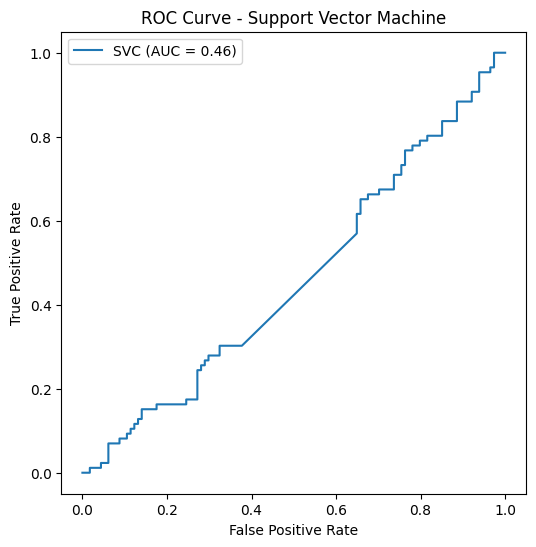

AUC for SVC: 0.4598633210934312
----- K-Nearest Neighbors -----
Precisión: 0.425


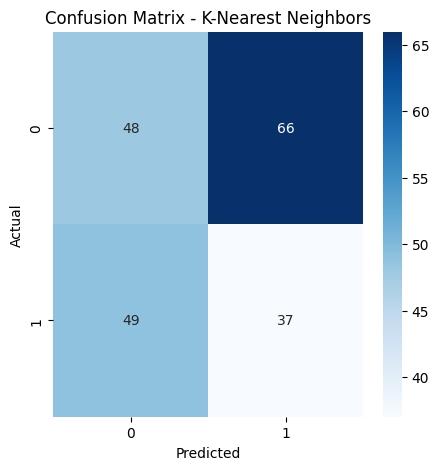

              precision    recall  f1-score   support

           0       0.49      0.42      0.45       114
           1       0.36      0.43      0.39        86

    accuracy                           0.42       200
   macro avg       0.43      0.43      0.42       200
weighted avg       0.44      0.42      0.43       200



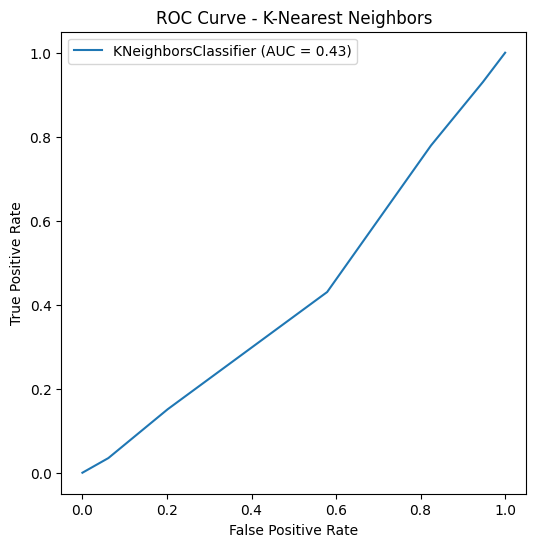

AUC for KNeighborsClassifier: 0.42803957568339446
----- Decision Tree -----
Precisión: 0.485


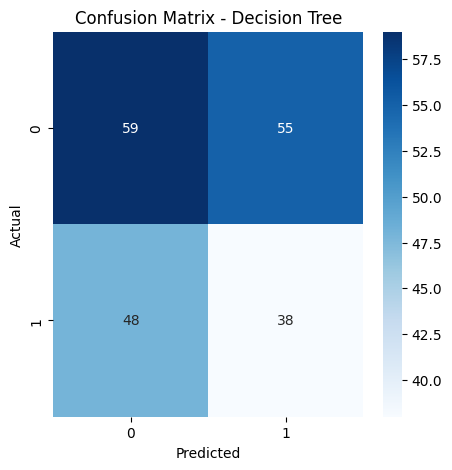

              precision    recall  f1-score   support

           0       0.55      0.52      0.53       114
           1       0.41      0.44      0.42        86

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.49      0.48      0.49       200



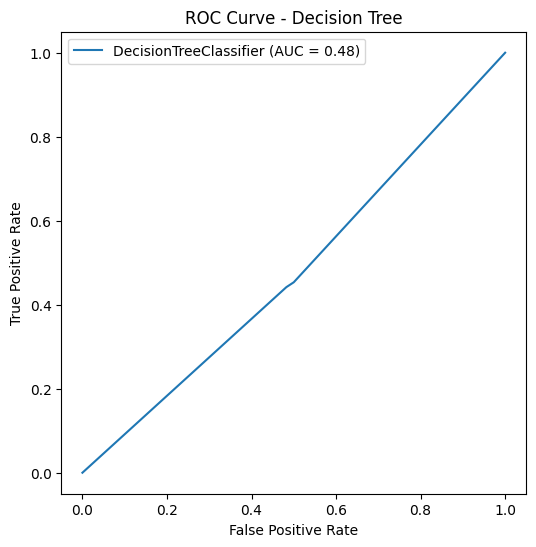

AUC for DecisionTreeClassifier: 0.47781517747858016


<ipython-input-25-2674bae48c1f>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette='viridis')


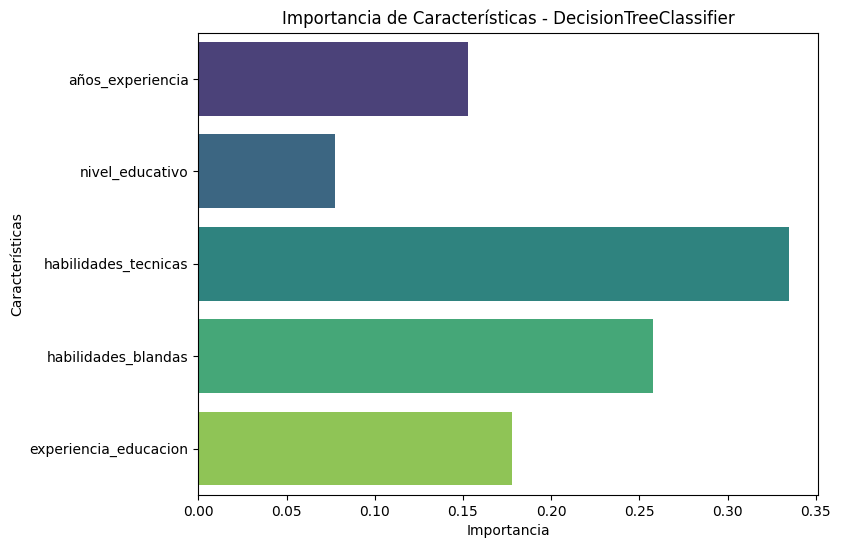

In [ ]:
!pip install scikit-learn pandas matplotlib wordcloud requests beautifulsoup4
import requests
from wordcloud import WordCloud
from bs4 import BeautifulSoup
from collections import Counter
import re
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
import seaborn as sns


# Generar datos ficticios más grandes y complejos
np.random.seed(42)  # Para reproducibilidad
num_samples = 1000

data = {
    'años_experiencia': np.random.randint(0, 20, num_samples),
    'nivel_educativo': np.random.randint(1, 5, num_samples),  # 1=Básico, 2=Grado, 3=Máster, 4=Doctorado
    'habilidades_tecnicas': np.random.randint(0, 10, num_samples),  # Número de habilidades técnicas
    'habilidades_blandas': np.random.randint(0, 10, num_samples),  # Número de habilidades blandas
    'empleado': np.random.choice([0, 1], num_samples)  # 1=Consiguió empleo, 0=No
}

df = pd.DataFrame(data)

# Crear una columna de interacción (opcional, pero puede mejorar el modelo)
df['experiencia_educacion'] = df['años_experiencia'] * df['nivel_educativo']

# Características y objetivo
X = df[['años_experiencia', 'nivel_educativo', 'habilidades_tecnicas', 'habilidades_blandas', 'experiencia_educacion']]
y = df['empleado']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos de predicción
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"----- {name} -----")
    print("Precisión:", accuracy_score(y_test, y_pred))

    # Plot Confusion Matrix
    plot_confusion_matrix(y_test, y_pred, name)

    print(classification_report(y_test, y_pred))

    # Plot ROC Curve if available
    if hasattr(model, 'predict_proba'):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = roc_auc_score(y_test, y_pred_prob)
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend()
        plt.show()
        print(f"AUC for {model.__class__.__name__}: {roc_auc}")
    else:
        print(f"ROC curve not available for {model.__class__.__name__} because predict_proba is not available.")

# Feature Importance (if available)
if hasattr(model, 'feature_importances_'):
    feature_importances = model.feature_importances_
    features = ['años_experiencia', 'nivel_educativo', 'habilidades_tecnicas', 'habilidades_blandas', 'experiencia_educacion']
    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature_importances, y=features, palette='viridis')
    plt.xlabel("Importancia")
    plt.ylabel("Características")
    plt.title(f"Importancia de Características - {model.__class__.__name__}")
    plt.show()
else:
    print(f"Feature importance not available for {model.__class__.__name__}")

In [ ]:
import pandas as pd
import numpy as np
import random

def generar_datos_ficticios(num_filas=1000):
    nombres = ['Ana', 'Carlos', 'Sofía', 'David', 'Laura', 'Javier', 'Marta', 'Sergio', 'Elena', 'Raúl']
    apellidos = ['López', 'Martínez', 'García', 'Rodríguez', 'Pérez', 'Sánchez', 'Díaz', 'Ruiz', 'Álvarez', 'Romero']
    sexos = ['Mujer', 'Hombre']
    residencias = ['Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Bilbao', 'Zaragoza', 'Málaga', 'Murcia', 'Granada', 'Alicante']
    ambitos_laborales = ['Tecnología', 'Marketing', 'Educación', 'Salud', 'Finanzas', 'Construcción', 'Turismo', 'Logística', 'Administración pública', 'Comercio']
    puestos_trabajo = ['Desarrollador/a', 'Analista', 'Profesor/a', 'Enfermero/a', 'Contable', 'Arquitecto/a', 'Recepcionista', 'Transportista', 'Funcionario/a', 'Vendedor/a']
    niveles_educativos = ['Bachillerato', 'Formación Profesional', 'Licenciatura', 'Máster', 'Doctorado']
    competencias_blandas = ['Comunicación', 'Trabajo en equipo', 'Liderazgo', 'Empatía', 'Organización', 'Creatividad', 'Atención al cliente', 'Responsabilidad', 'Negociación', 'Persuasión']
    competencias_duras = ['Python', 'SEO', 'Microsoft Office', 'Primeros auxilios', 'Excel avanzado', 'AutoCAD', 'Idiomas', 'Conducción', 'Legislación', 'Técnicas de venta']
    situaciones_laborales = ['Empleado/a', 'Desempleado/a', 'Autónomo/a']

    datos = {
        'nombre': [random.choice(nombres) + ' ' + random.choice(apellidos) for _ in range(num_filas)],
        'edad': np.random.randint(18, 65, num_filas),
        'sexo': np.random.choice(sexos, num_filas),
        'residencia': np.random.choice(residencias, num_filas),
        'ambito_laboral': np.random.choice(ambitos_laborales, num_filas),
        'puesto_trabajo_previo': [random.choice(puestos_trabajo) + ' ' + random.choice(['junior', 'senior', 'especialista', 'jefe/a de equipo', 'director/a']) for _ in range(num_filas)],
        'experiencia_laboral': np.random.randint(0, 20, num_filas),
        'nivel_educativo': np.random.choice(niveles_educativos, num_filas),
        'competencias_blandas': [', '.join(random.sample(competencias_blandas, random.randint(1, 3))) for _ in range(num_filas)],
        'competencias_duras': [', '.join(random.sample(competencias_duras, random.randint(1, 3))) for _ in range(num_filas)],
        'situacion_laboral': np.random.choice(situaciones_laborales, num_filas)
    }

    df = pd.DataFrame(datos)
    return df

df_ficticio = generar_datos_ficticios()
df_ficticio.to_csv('datos_ficticios.csv', index=False)
output_file = "datos_ficticios.csv"
print(f"\nResultados guardados en '{output_file}'. Puedes descargarlo desde el enlace generado.")


Resultados guardados en 'datos_ficticios.csv'. Puedes descargarlo desde el enlace generado.


Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['experiencia_laboral',
                                                   'edad']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['nivel_educativo',
                                                   'competencias_duras',
                                                   'competencias_blandas',
                                                   'residencia',
                                                   'puesto_trabajo_previo',
                                                   'sexo'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_est

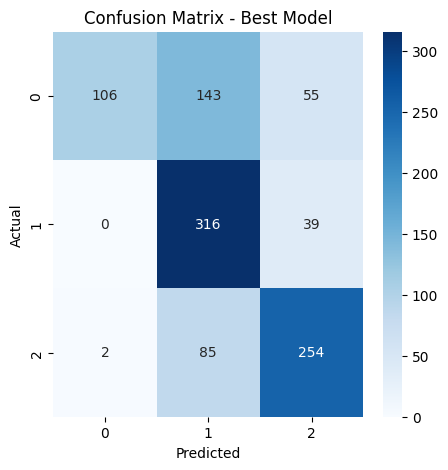

----- Random Forest -----
Precisión: 0.485


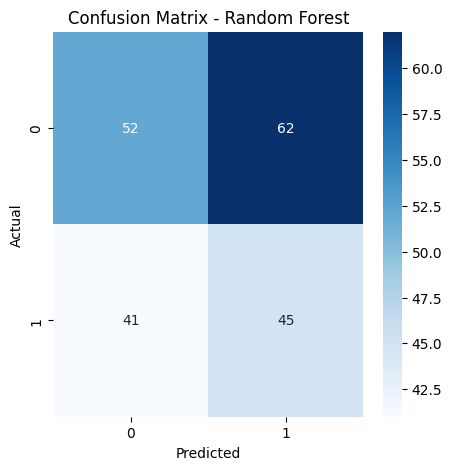

              precision    recall  f1-score   support

           0       0.56      0.46      0.50       114
           1       0.42      0.52      0.47        86

    accuracy                           0.48       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.50      0.48      0.49       200



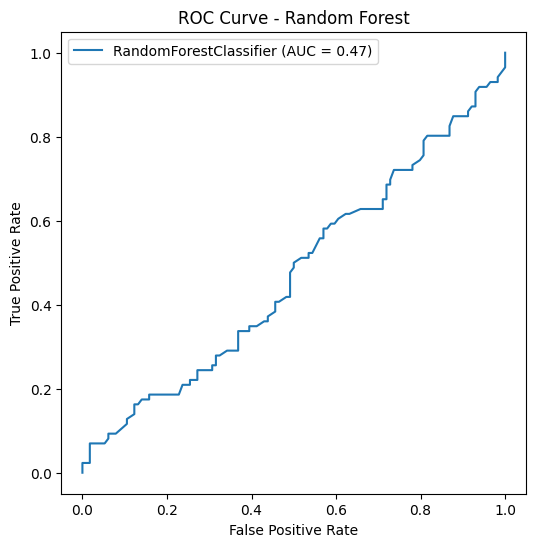

AUC for RandomForestClassifier: 0.47322521419828634
----- Gradient Boosting -----
Precisión: 0.475


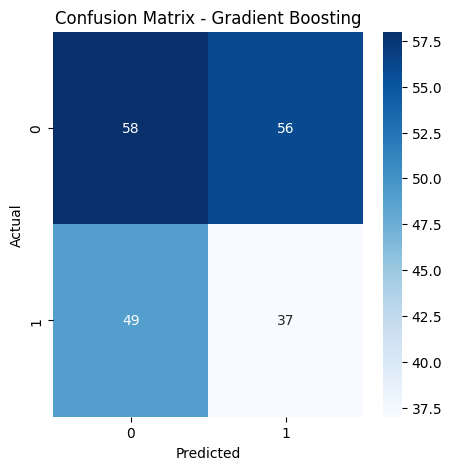

              precision    recall  f1-score   support

           0       0.54      0.51      0.52       114
           1       0.40      0.43      0.41        86

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.48      0.47      0.48       200



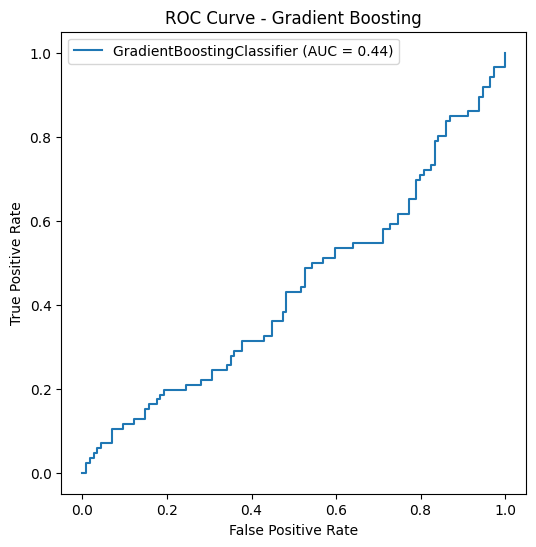

AUC for GradientBoostingClassifier: 0.4382904936760506
----- AdaBoost -----
Precisión: 0.49


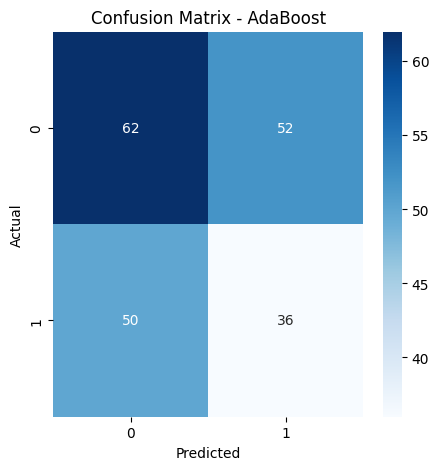

              precision    recall  f1-score   support

           0       0.55      0.54      0.55       114
           1       0.41      0.42      0.41        86

    accuracy                           0.49       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.49      0.49      0.49       200



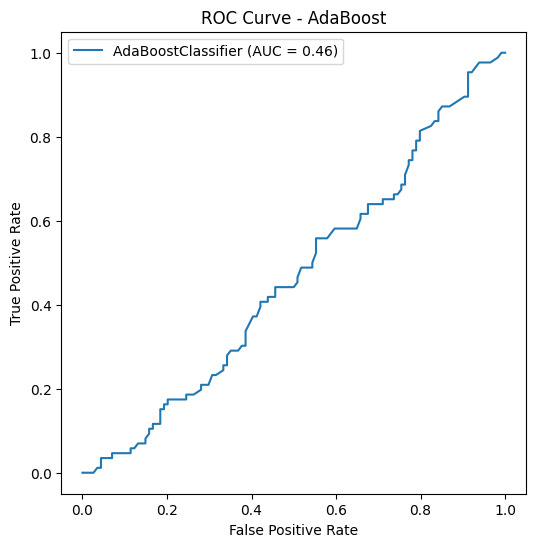

AUC for AdaBoostClassifier: 0.4640452876376989
----- Logistic Regression -----
Precisión: 0.53


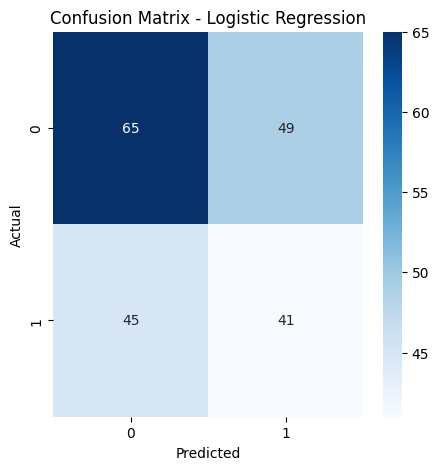

              precision    recall  f1-score   support

           0       0.59      0.57      0.58       114
           1       0.46      0.48      0.47        86

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.53      0.53      0.53       200



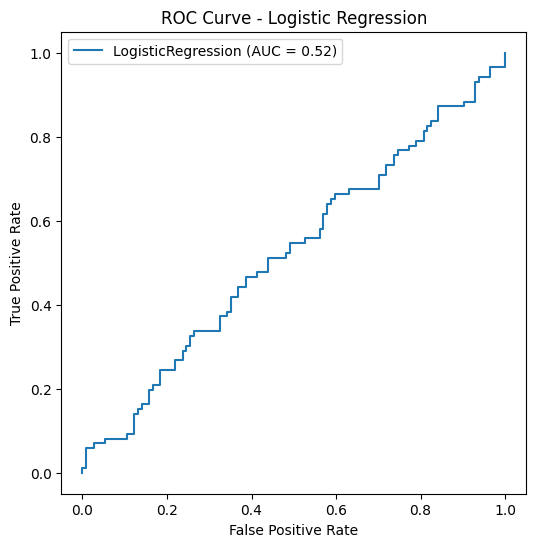

AUC for LogisticRegression: 0.5220318237454101


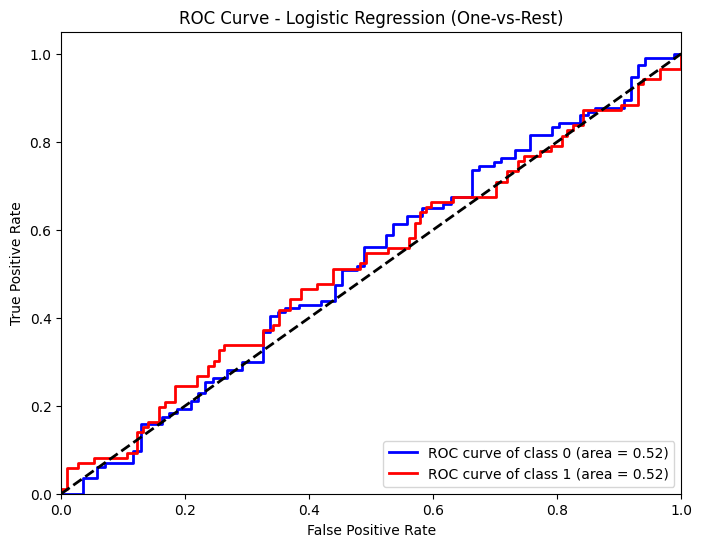

----- Support Vector Machine -----
Precisión: 0.455


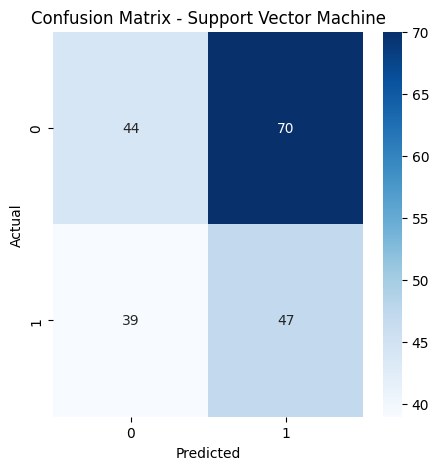

              precision    recall  f1-score   support

           0       0.53      0.39      0.45       114
           1       0.40      0.55      0.46        86

    accuracy                           0.46       200
   macro avg       0.47      0.47      0.45       200
weighted avg       0.47      0.46      0.45       200

ROC curve not available for SVC because predict_proba is not available.
----- K-Nearest Neighbors -----
Precisión: 0.425


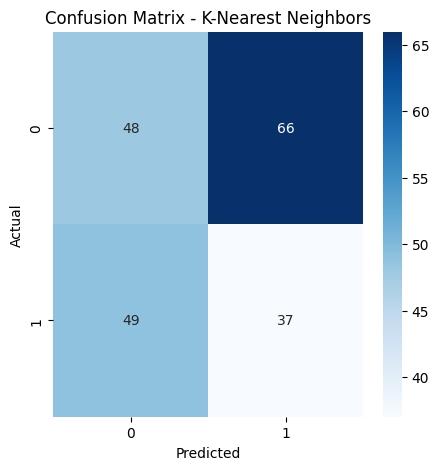

              precision    recall  f1-score   support

           0       0.49      0.42      0.45       114
           1       0.36      0.43      0.39        86

    accuracy                           0.42       200
   macro avg       0.43      0.43      0.42       200
weighted avg       0.44      0.42      0.43       200



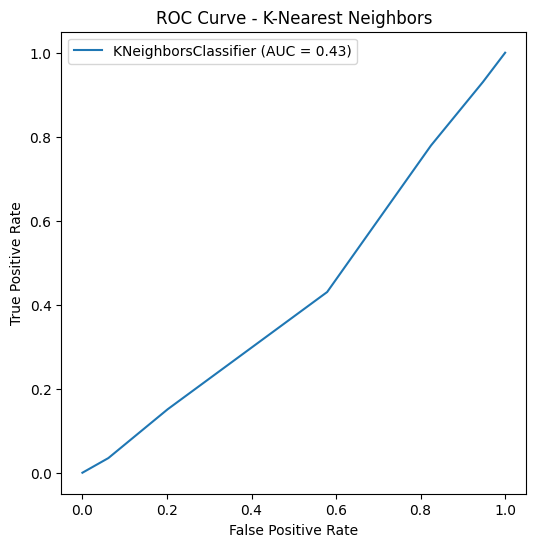

AUC for KNeighborsClassifier: 0.42803957568339446
----- Decision Tree -----
Precisión: 0.485


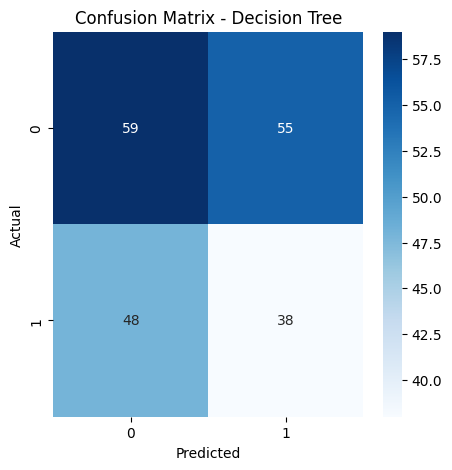

              precision    recall  f1-score   support

           0       0.55      0.52      0.53       114
           1       0.41      0.44      0.42        86

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.49      0.48      0.49       200



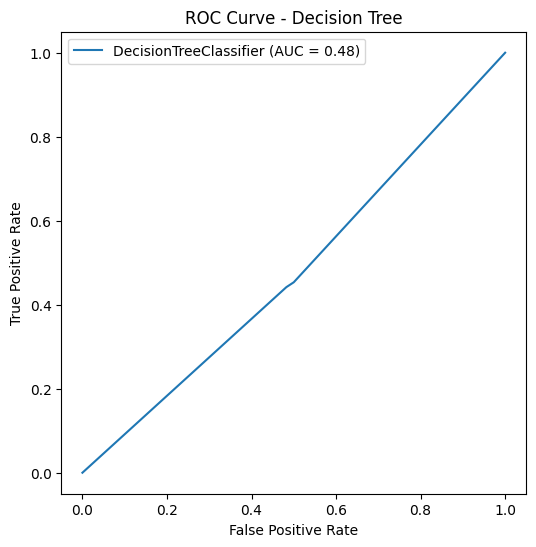

AUC for DecisionTreeClassifier: 0.47781517747858016


<ipython-input-27-3ede03c7b141>:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette='viridis')


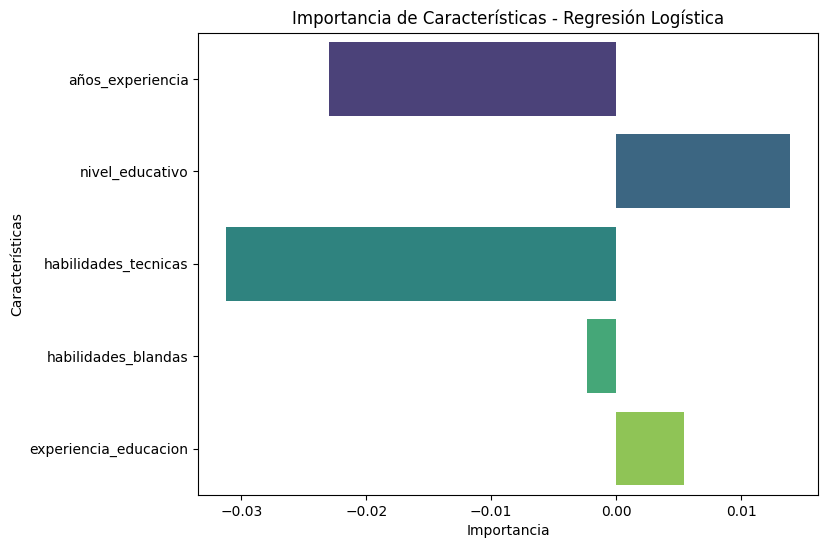

<ipython-input-27-3ede03c7b141>:164: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[:num_features_to_display], y=feature_names[:num_features_to_display], palette='viridis')


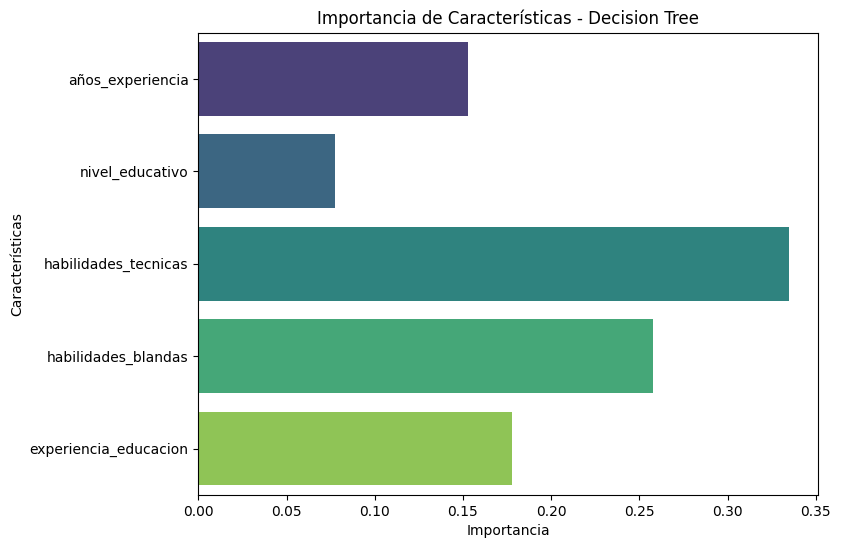

<ipython-input-27-3ede03c7b141>:179: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[:num_features_to_display], y=feature_names[:num_features_to_display], palette='viridis')


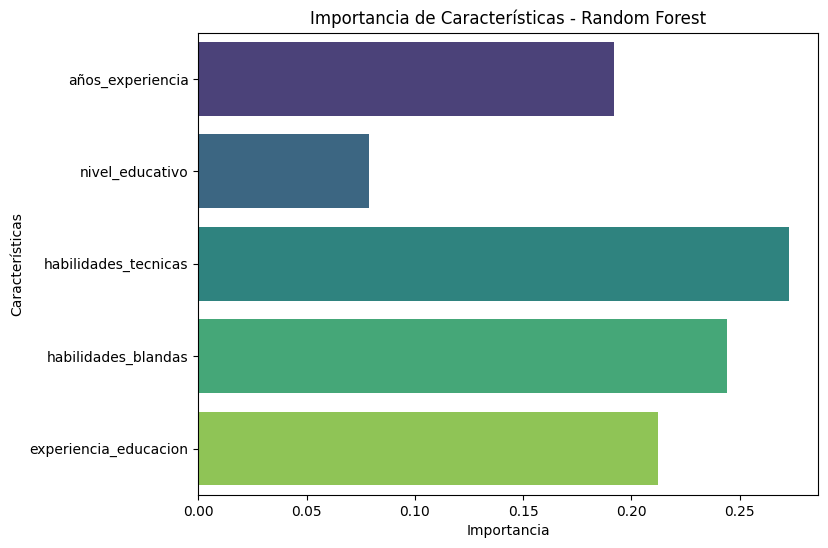

<ipython-input-27-3ede03c7b141>:195: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[:num_features_to_display], y=feature_names[:num_features_to_display], palette='viridis')


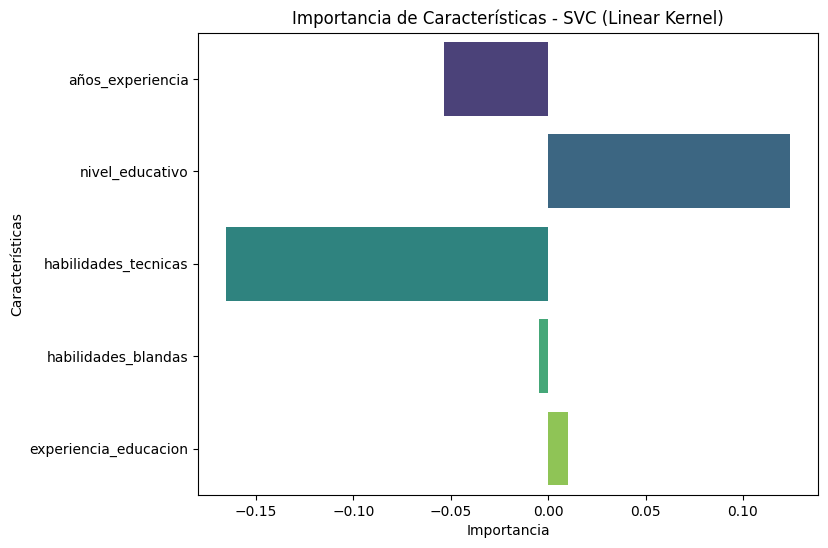

<ipython-input-27-3ede03c7b141>:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[:num_features_to_display], y=feature_names[:num_features_to_display], palette='viridis')


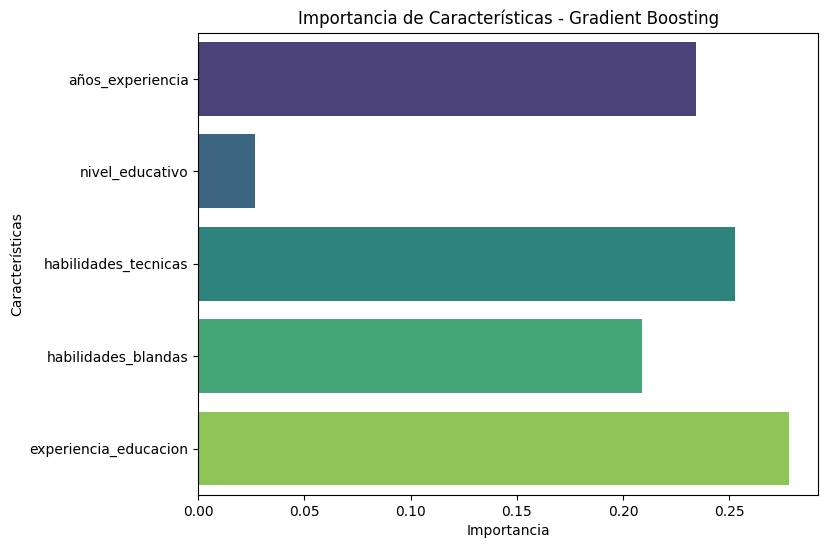

In [ ]:
!pip install scikit-learn pandas matplotlib wordcloud requests beautifulsoup4
import requests
from wordcloud import WordCloud
from bs4 import BeautifulSoup
from collections import Counter
import re
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Load data
df_ficticio = pd.read_csv('datos_ficticios.csv')

# Features and target
X = df_ficticio[['experiencia_laboral', 'edad', 'nivel_educativo', 'competencias_duras', 'competencias_blandas', 'residencia', 'puesto_trabajo_previo', 'sexo']]
y = df_ficticio['situacion_laboral']
model.feature_importances_= X

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Preprocessing
# 1. Label Encoding for target
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

# 2. One-Hot Encoding for categorical features
categorical_features = ['nivel_educativo', 'competencias_duras', 'competencias_blandas', 'residencia', 'puesto_trabajo_previo', 'sexo']
numerical_features = ['experiencia_laboral', 'edad']

# 3. Create preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),
    ])

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42)),  # Start with RandomForest
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)

print("Best Model:", best_model)
print("Accuracy:", accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

# Plot confusion matrix
plot_confusion_matrix(y, y_pred, "Best Model")

# Modelos de predicción
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"----- {name} -----")
    print("Precisión:", accuracy_score(y_test, y_pred))

    #Calling the function with all three arguments.
    plot_confusion_matrix(y_test, y_pred, name)

    print(classification_report(y_test, y_pred))

    # Plot ROC Curve if available
    if hasattr(model, 'predict_proba'):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = roc_auc_score(y_test, y_pred_prob)
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend()
        plt.show()
        print(f"AUC for {model.__class__.__name__}: {roc_auc}")
    else:
        print(f"ROC curve not available for {model.__class__.__name__} because predict_proba is not available.")

 # ROC Curve - Modify for Multiclass
    if name in ["Logistic Regression"]:  # Apply only to Logistic Regression for now
        # Get probabilities for each class
        y_score = model.predict_proba(X_test)

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        n_classes = y_score.shape[1]  # Get number of classes
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=i)
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curves for each class
        plt.figure(figsize=(8, 6))
        colors = ['blue', 'red', 'green']  # Adjust colors if needed
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name} (One-vs-Rest)')
        plt.legend(loc="lower right")
        plt.show()

# Importancia de características en Reg Log
log = models["Logistic Regression"]
feature_importances = log.coef_[0]

feature_names = X_train.columns
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_names, palette='viridis')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de Características - Regresión Logística")
plt.show()

#Árbol de Decisión
DecisionTree = models["Decision Tree"]
feature_importances = DecisionTree.feature_importances_
# Get feature names after OneHotEncoding
feature_names = X_train.columns
plt.figure(figsize=(8, 6))
# Use feature_names instead of features for the y-axis
# Limit the number of features to display for better visualization
num_features_to_display = 20  # Adjust this number as needed
sns.barplot(x=feature_importances[:num_features_to_display], y=feature_names[:num_features_to_display], palette='viridis')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de Características - Decision Tree")
plt.show()

# Random Forest
rf = models["Random Forest"]
feature_importances = rf.feature_importances_
# Get feature names after OneHotEncoding
feature_names = X_train.columns
plt.figure(figsize=(8, 6))
# Use feature_names instead of features for the y-axis
# Limit the number of features to display for better visualization
num_features_to_display = 20  # Adjust this number as needed
sns.barplot(x=feature_importances[:num_features_to_display], y=feature_names[:num_features_to_display], palette='viridis')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de Características - Random Forest")
plt.show()

#Linear SVC
linear_SVC = SVC(kernel='linear', random_state=42)
linear_SVC.fit(X_train, y_train)
feature_importances = linear_SVC.coef_[0]
# Get feature names after OneHotEncoding
feature_names = X_train.columns
plt.figure(figsize=(8, 6))
# Use feature_names instead of features for the y-axis
# Limit the number of features to display for better visualization
num_features_to_display = 20  # Adjust this number as needed
sns.barplot(x=feature_importances[:num_features_to_display], y=feature_names[:num_features_to_display], palette='viridis')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de Características - SVC (Linear Kernel)")
plt.show()

# Gradient Boost
GradientBoost = models["Gradient Boosting"]
feature_importances = GradientBoost.feature_importances_
# Get feature names after OneHotEncoding
feature_names = X_train.columns
plt.figure(figsize=(8, 6))
# Use feature_names instead of features for the y-axis
# Limit the number of features to display for better visualization
num_features_to_display = 20  # Adjust this number as needed
sns.barplot(x=feature_importances[:num_features_to_display], y=feature_names[:num_features_to_display], palette='viridis')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de Características - Gradient Boosting")
plt.show()



----- Random Forest -----
Precisión: 0.315


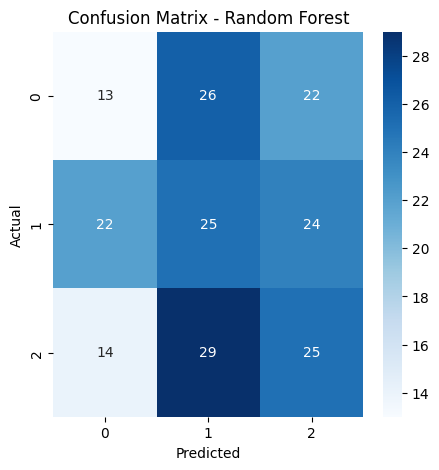

              precision    recall  f1-score   support

           0       0.27      0.21      0.24        61
           1       0.31      0.35      0.33        71
           2       0.35      0.37      0.36        68

    accuracy                           0.32       200
   macro avg       0.31      0.31      0.31       200
weighted avg       0.31      0.32      0.31       200



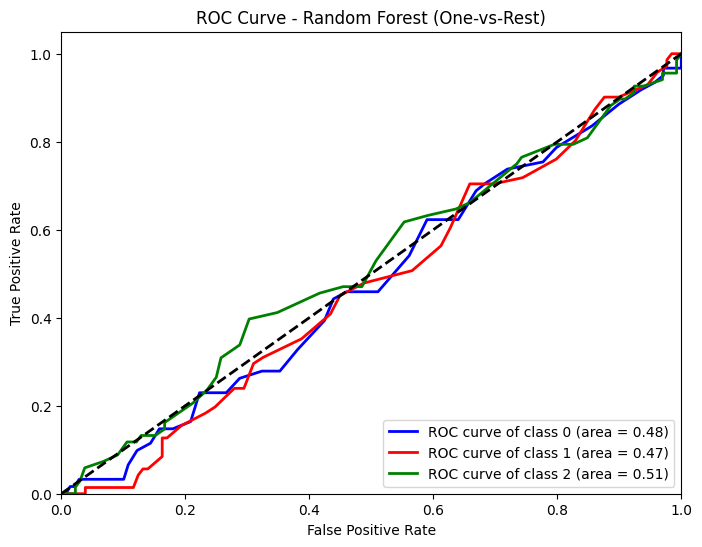

AUC for class 0: 0.4804222196013681
AUC for class 1: 0.47303199039196414
AUC for class 2: 0.5137032085561498
----- Gradient Boosting -----
Precisión: 0.375


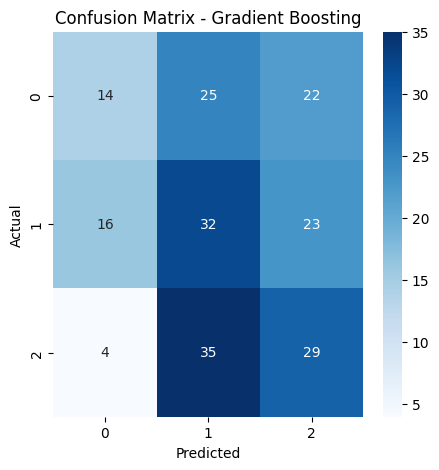

              precision    recall  f1-score   support

           0       0.41      0.23      0.29        61
           1       0.35      0.45      0.39        71
           2       0.39      0.43      0.41        68

    accuracy                           0.38       200
   macro avg       0.38      0.37      0.37       200
weighted avg       0.38      0.38      0.37       200



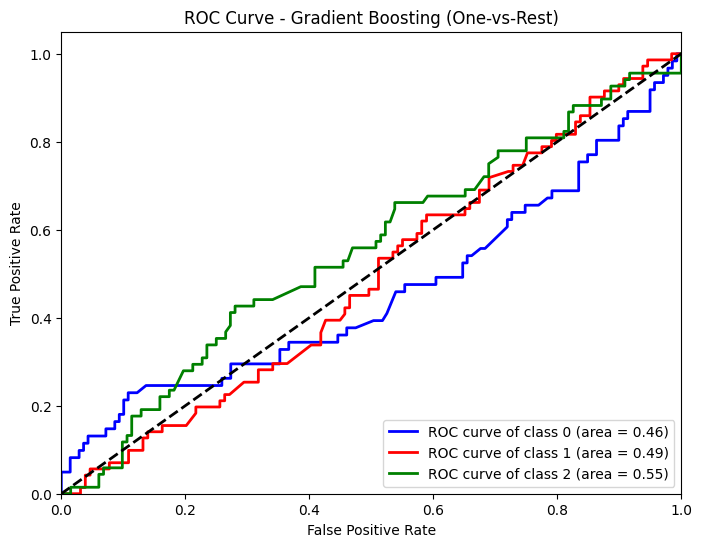

AUC for class 0: 0.45689350159216885
AUC for class 1: 0.489136368599192
AUC for class 2: 0.5513591800356507
----- AdaBoost -----
Precisión: 0.355


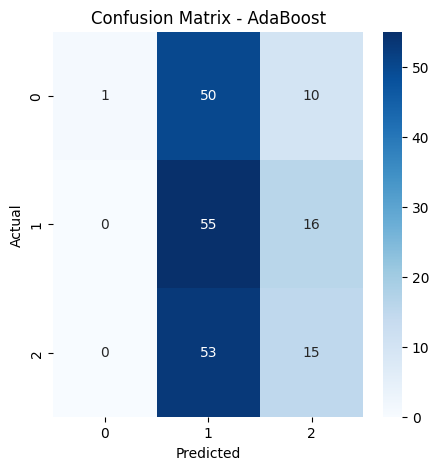

              precision    recall  f1-score   support

           0       1.00      0.02      0.03        61
           1       0.35      0.77      0.48        71
           2       0.37      0.22      0.28        68

    accuracy                           0.35       200
   macro avg       0.57      0.34      0.26       200
weighted avg       0.55      0.35      0.27       200



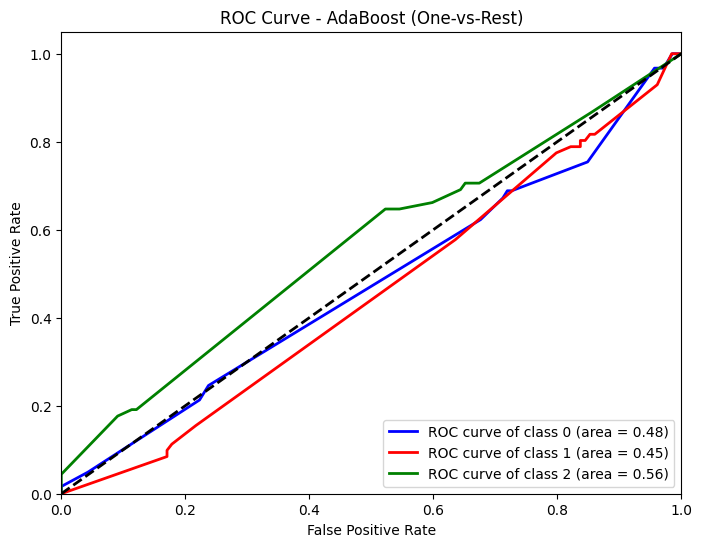

AUC for class 0: 0.4756457129378465
AUC for class 1: 0.45174145649088326
AUC for class 2: 0.5628899286987523
----- Logistic Regression -----
Precisión: 0.355


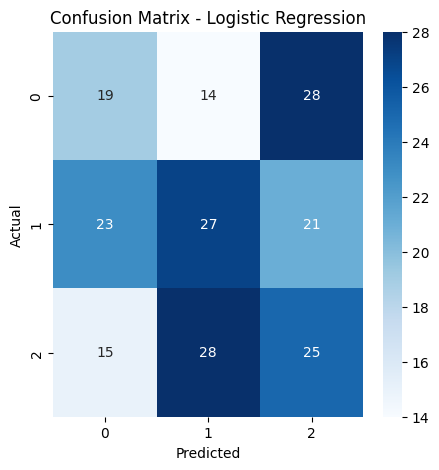

              precision    recall  f1-score   support

           0       0.33      0.31      0.32        61
           1       0.39      0.38      0.39        71
           2       0.34      0.37      0.35        68

    accuracy                           0.35       200
   macro avg       0.35      0.35      0.35       200
weighted avg       0.36      0.35      0.35       200



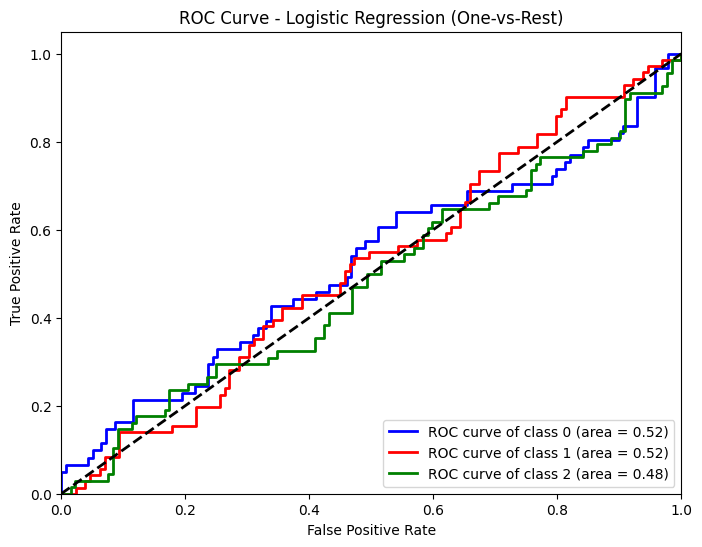

AUC for class 0: 0.5201085033612455
AUC for class 1: 0.5155584670815591
AUC for class 2: 0.482397504456328
----- Support Vector Machine -----
Precisión: 0.37


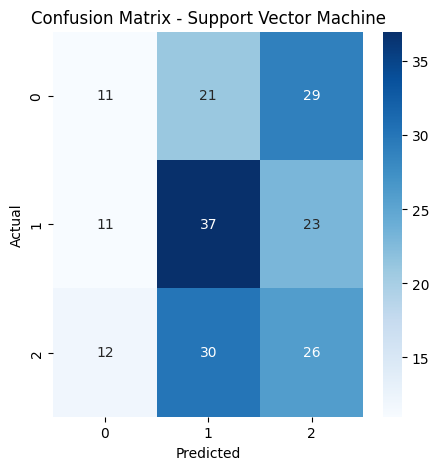

              precision    recall  f1-score   support

           0       0.32      0.18      0.23        61
           1       0.42      0.52      0.47        71
           2       0.33      0.38      0.36        68

    accuracy                           0.37       200
   macro avg       0.36      0.36      0.35       200
weighted avg       0.36      0.37      0.36       200

ROC curve not available for SVC because predict_proba is not available.
----- K-Nearest Neighbors -----
Precisión: 0.28


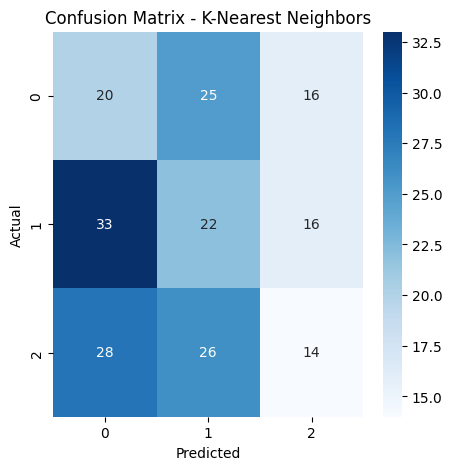

              precision    recall  f1-score   support

           0       0.25      0.33      0.28        61
           1       0.30      0.31      0.31        71
           2       0.30      0.21      0.25        68

    accuracy                           0.28       200
   macro avg       0.28      0.28      0.28       200
weighted avg       0.29      0.28      0.28       200



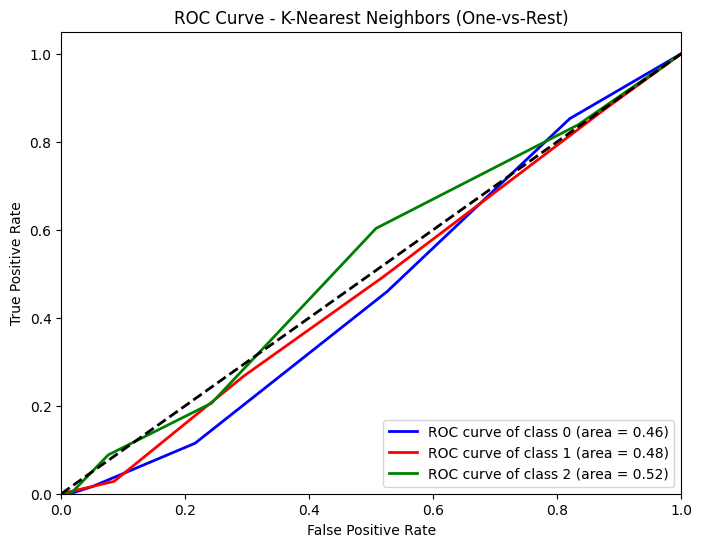

AUC for class 0: 0.45990093171364543
AUC for class 1: 0.47739927939731414
AUC for class 2: 0.5223373440285205
----- Decision Tree -----
Precisión: 0.305


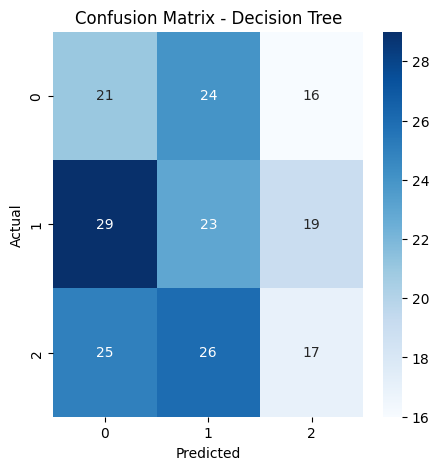

              precision    recall  f1-score   support

           0       0.28      0.34      0.31        61
           1       0.32      0.32      0.32        71
           2       0.33      0.25      0.28        68

    accuracy                           0.30       200
   macro avg       0.31      0.31      0.30       200
weighted avg       0.31      0.30      0.30       200



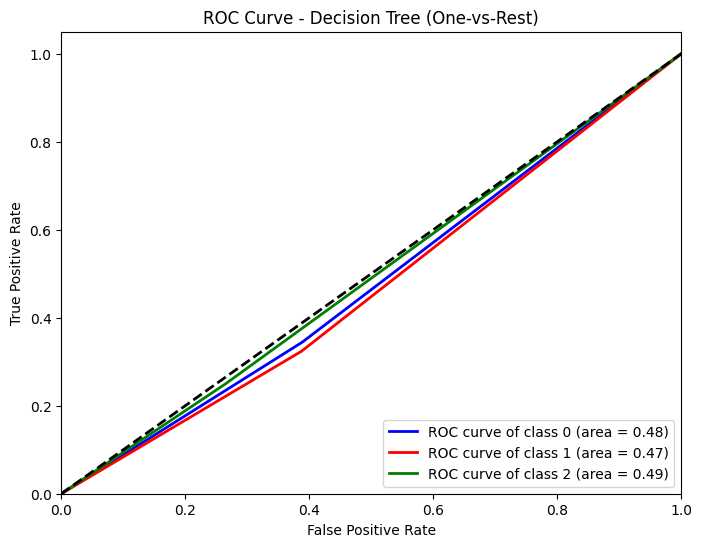

AUC for class 0: 0.4778865432244368
AUC for class 1: 0.4681733813735124
AUC for class 2: 0.49242424242424243


In [ ]:
!pip install scikit-learn pandas matplotlib wordcloud requests beautifulsoup4
import requests
from wordcloud import WordCloud
from bs4 import BeautifulSoup
from collections import Counter
import re
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier  # Import OneVsRestClassifier


# Confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


# Cargar data
df_ficticio = pd.read_csv('datos_ficticios.csv')

# Features y objetivo
X = df_ficticio[['experiencia_laboral', 'edad', 'nivel_educativo', 'competencias_duras', 'competencias_blandas', 'residencia', 'puesto_trabajo_previo', 'sexo']]
y = df_ficticio['situacion_laboral']

# Split data (initial split for hold-out set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Stratify for balanced classes

# Preprocessing
# 1. Label Encoding for target
label_encoder_y = LabelEncoder()
y_train = label_encoder_y.fit_transform(y_train)  # Fit only on training data
y_test = label_encoder_y.transform(y_test)       # Transform test data

# 2. One-Hot Encoding for categorical features (using sparse output)
categorical_features = ['nivel_educativo', 'competencias_duras', 'competencias_blandas', 'residencia', 'puesto_trabajo_previo', 'sexo']
numerical_features = ['experiencia_laboral', 'edad']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),  # sparse=False for models that don't support sparse matrices
    ])

# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)

# Transform the test data
X_test = preprocessor.transform(X_test)

# Modelos de predicción
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(random_state=42)),  # Wrap with OneVsRestClassifier
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"----- {name} -----")
    print("Precisión:", accuracy_score(y_test, y_pred))

    #Calling the function with all three arguments.
    plot_confusion_matrix(y_test, y_pred, name)

    print(classification_report(y_test, y_pred))
# Plot ROC Curve if available
    if hasattr(model, 'predict_proba'):
        # Modify to handle multiclass ROC curve
        y_pred_prob = model.predict_proba(X_test)  # Get probabilities for all classes

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        n_classes = y_pred_prob.shape[1]  # Get number of classes
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curves for each class
        plt.figure(figsize=(8, 6))
        colors = ['blue', 'red', 'green']  # Adjust colors if needed
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name} (One-vs-Rest)')
        plt.legend(loc="lower right")
        plt.show()

        # Print AUC for each class
        for i in range(n_classes):
            print(f"AUC for class {i}: {roc_auc[i]}")

    else:
        print(f"ROC curve not available for {model.__class__.__name__} because predict_proba is not available.")

<ipython-input-36-d671233868fe>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_feature_importances, y=top_feature_names, palette='viridis')


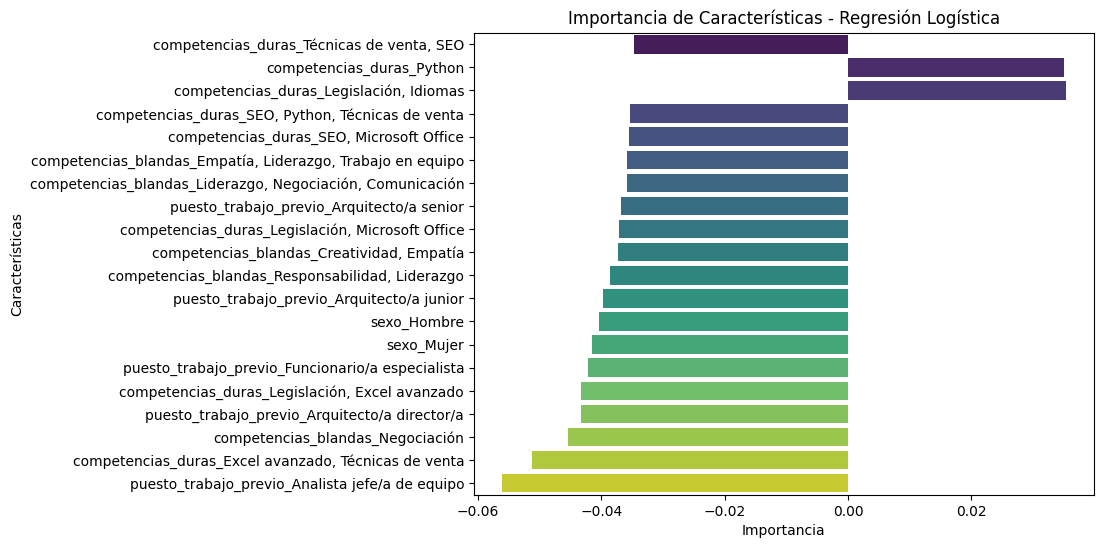

<ipython-input-36-d671233868fe>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[:num_features_to_display], y=feature_names[:num_features_to_display], palette='viridis')


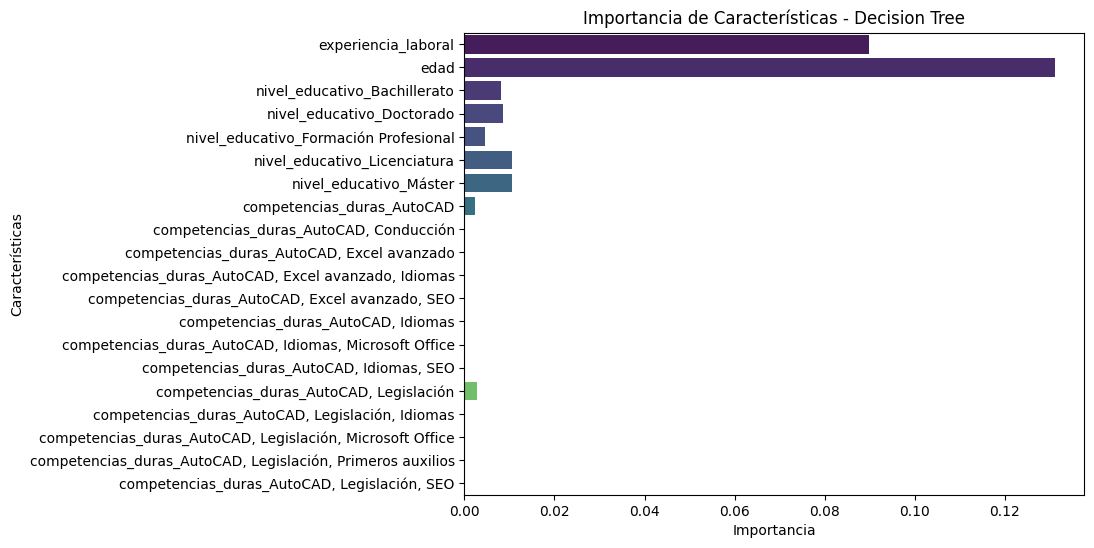

<ipython-input-36-d671233868fe>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[:num_features_to_display], y=feature_names[:num_features_to_display], palette='viridis')


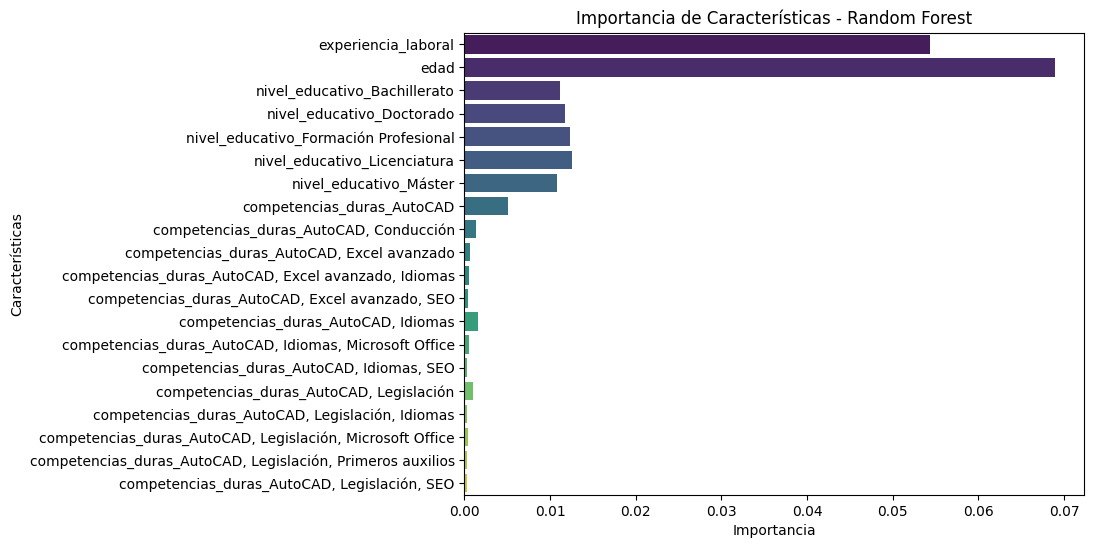

<ipython-input-36-d671233868fe>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[:num_features_to_display], y=feature_names[:num_features_to_display], palette='viridis')


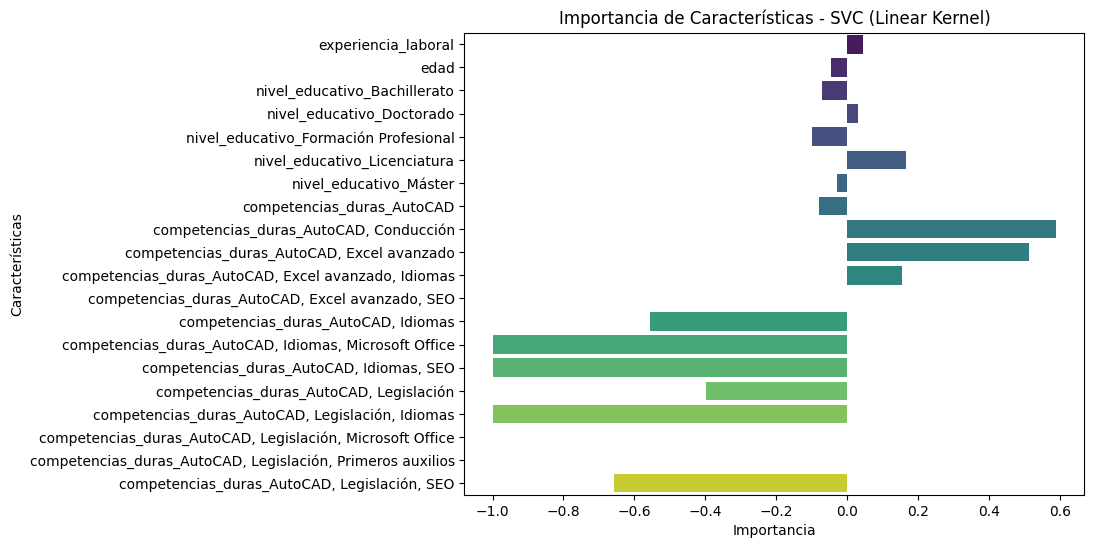

<ipython-input-36-d671233868fe>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[:num_features_to_display], y=feature_names[:num_features_to_display], palette='viridis')


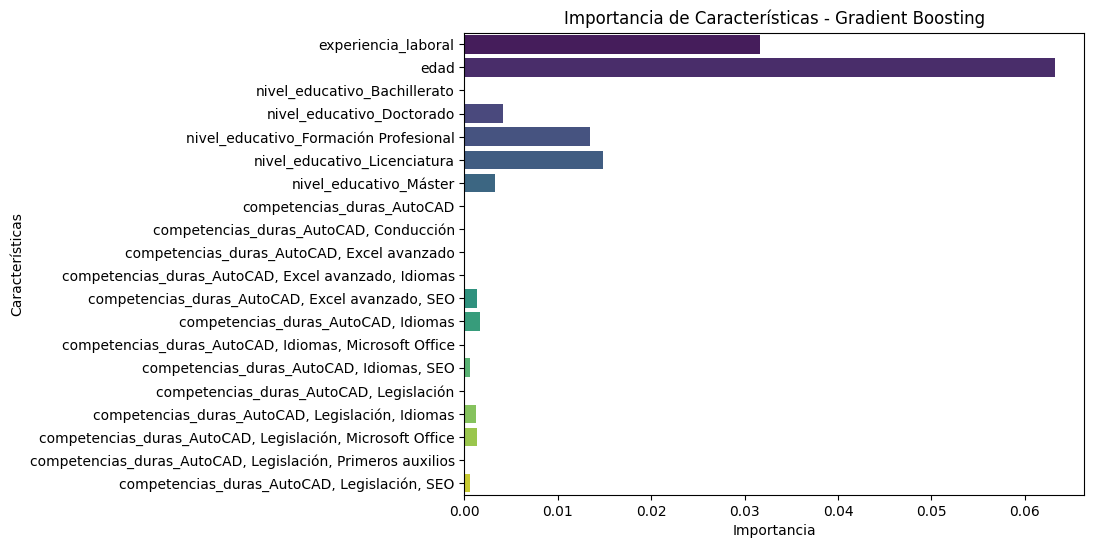

In [ ]:
# Importancia de características en Reg Log
log = models["Logistic Regression"]

# OneHotEncoding
num_features = preprocessor.transformers_[0][2]
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([num_features, cat_features])

#Logistic Regression model
feature_importances_per_class = [estimator.coef_ for estimator in log.estimators_]
feature_importances = np.mean(feature_importances_per_class, axis=0).ravel()

plt.figure(figsize=(8, 6))

top_n_features = 20
top_feature_indices = np.argsort(np.abs(feature_importances))[-top_n_features:]
top_feature_names = feature_names[top_feature_indices]
top_feature_importances = feature_importances[top_feature_indices]

sns.barplot(x=top_feature_importances, y=top_feature_names, palette='viridis')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de Características - Regresión Logística")
plt.show()

#Árbol de Decisión
DecisionTree = models["Decision Tree"]
feature_importances = DecisionTree.feature_importances_

#  OneHotEncoding
num_features = preprocessor.transformers_[0][2]
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([num_features, cat_features])

plt.figure(figsize=(8, 6))

num_features_to_display = 20
sns.barplot(x=feature_importances[:num_features_to_display], y=feature_names[:num_features_to_display], palette='viridis')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de Características - Decision Tree")
plt.show()

# Random Forest
rf = models["Random Forest"]
feature_importances = rf.feature_importances_
#OneHotEncoding
num_features = preprocessor.transformers_[0][2]
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features) s
feature_names = np.concatenate([num_features, cat_features])

plt.figure(figsize=(8, 6))

num_features_to_display = 20
sns.barplot(x=feature_importances[:num_features_to_display], y=feature_names[:num_features_to_display], palette='viridis')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de Características - Random Forest")
plt.show()

#Linear SVC
linear_SVC = SVC(kernel='linear', random_state=42)
linear_SVC.fit(X_train, y_train)
feature_importances = linear_SVC.coef_[0]
# OneHotEncoding
num_features = preprocessor.transformers_[0][2]
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([num_features, cat_features])  # Combine all feature names

plt.figure(figsize=(8, 6))

num_features_to_display = 20
sns.barplot(x=feature_importances[:num_features_to_display], y=feature_names[:num_features_to_display], palette='viridis')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de Características - SVC (Linear Kernel)")
plt.show()

# Gradient Boost
GradientBoost = models["Gradient Boosting"]
feature_importances = GradientBoost.feature_importances_
num_features = preprocessor.transformers_[0][2]
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([num_features, cat_features])

plt.figure(figsize=(8, 6))

num_features_to_display = 20
sns.barplot(x=feature_importances[:num_features_to_display], y=feature_names[:num_features_to_display], palette='viridis')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de Características - Gradient Boosting")
plt.show()

# **Conclusiones**